In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

In [16]:
# lab 1 function (modfied)

def linear_regression_PI(X, y):
    """
    Implements a Linear Regression model using the Moore-Penrose pseudo-inverse
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    
    Returns
    -------
    w : array
        Learnt parameters (column)
        
    Notes
    -----
    The first column of w corresponds to the bias (`w_0`)
    """
    # your code here

    w = np.linalg.pinv(X).dot(y) # Calculate the weights using the closed-form solution (pseudoinverse)
    
    return w.reshape(-1, 1)

def linear_regression_SGD(X, y, lr, max_iter=10):
    """
    Implements a Linear Regression model using Stochastic Gradient Descent
    
    Parameters
    ----------
    X : array
        A 2-dimensional array with samples in the rows and features in the columns
    y : array
        An array with the same number of  as samples in X, the values to predict
    lr : float
        Learning rate
    max_iter : int
        number of epochs to use for the gradient descent
    
    Returns
    -------
    w : array
        Learnt parameters (column)
    sse_history : array
        An array that contains the error of the model in every iteration
    Notes
    -----
    This function uses the gradient of the sum of squares function (Equations 3.12, and 3.23 in the Bishop book)
    """
    # your code here
    
    sse_history = list() 

    # Initialize the weights theta with random values from a gaussian distribution
    w = np.random.normal(scale=0.1, size=(X.shape[1], 1))

    # Loop for training the model using Stochastic Gradient Descent (SGD)
    for epoch in range(max_iter):
        # Shuffle the data indices to make the training stochastic
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        
        for index in indices:
        
            # Select a random index from the biased data
            xi = X[index]  # Get the random sample
            yi = y[index]  # Get the corresponding target

            # Calculate the gradient for the current sample
            gradient = (xi * (yi - np.dot(w.T, xi))).reshape(-1, 1)

            # Update the weights using the learning rate and the calculated gradient
            w = w + lr * gradient

        # Compute the predicted values using the dot product of input data (X) and weights (w)
        y_pred = np.dot(X, w)

        # Initialize the SSE (Sum of Squared Errors) to zero
        sse = 0

        # Loop through each data point to calculate the SSE
        for i in range(len(y)):
            # Calculate the squared error for each data point and add it to SSE
            squared_error = ((y[i] - y_pred[i][0]) ** 2) / 2
            sse += squared_error

        # Append the calculated SSE to the SSE history list
        sse_history.append(sse)
        
    return w, sse_history

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.

This lab starts with Part III of the previous one!



## Part 3 - Polynomial basis function

* Generate a 2D dataset using a sine wave (10 values for `x` in the interval $[0, 10]$), perturbed by a small gaussian noise. *Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0
* The Polynomial basis function that you will use is of the following form:
    - $\phi_i(x)=x^i$
* You will do this to create models of degrees 2, 4, and 9.
    - Transform your original `x` into the design matrix $\Phi$ by applying the basis functions to each element of `x`
    - For degree 2: $i\in[0,1,2]$, for degree 4: $i\in[0,1,2,3,4]$, and for degree 9: $i\in[0,1,2,...,9]$
    - *This means that for each Degree you will create a different $\Phi$ and fit a different regression model.*

* Plot the data and the prediction for each degree.
* Which degree of polynomial works better to model this scenario? 

Example: Let's say that $$x=\begin{bmatrix} x_1=2 \\ x_2=3 \\ x_3=1 \end{bmatrix}$$
Then for Degree 2 I will use the following basis functions: $\phi_0(x_j)=x_j^0, \phi_1(x_j)=x_j^1, \phi_2(x_j)=x_j^2$.

In this case, $\Phi$ will look like: 
$$\Phi=\begin{bmatrix} \phi_0(x_1)=x_1^0 & \phi_1(x_1)=x_1^1 & \phi_2(x_1)=x_1^2 \\ \phi_0(x_2)=x_2^0 & \phi_1(x_2)=x_2^1 & \phi_2(x_2)=x_2^2 \\ \phi_0(x_3)=x_3^0 & \phi_1(x_3)=x_3^1 & \phi_2(x_3)=x_3^2 \end{bmatrix}$$

Finally:
$$\Phi=\begin{bmatrix} 1 & 2 & 4 \\ 1 & 3 & 9 \\ 1 & 1 & 1 \end{bmatrix}$$

__*Important:* You have to code this exercise yourself.__



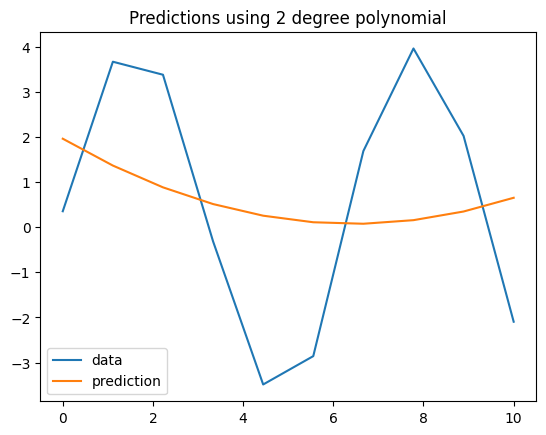

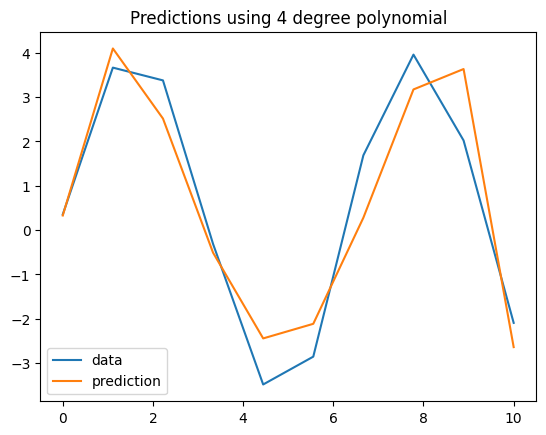

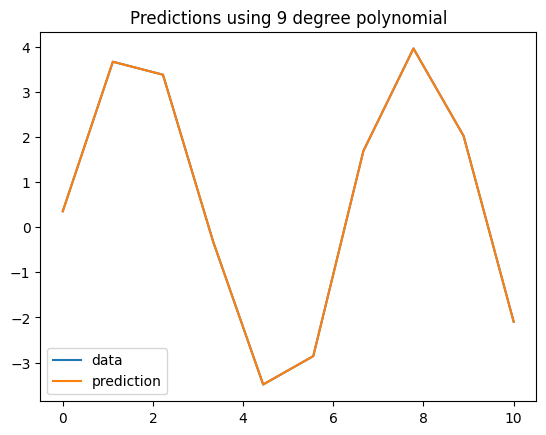

In [26]:
# your code here
np.random.seed(0)

X = np.linspace(0, 10, 10)

epsilon = np.random.normal(0, 0.2, 10)  
y = 4 * np.sin(X) + epsilon

#-------------------------------------- polynomial function

def polynomial_regression(X, y, degree):
    X = X.reshape(-1, 1) #column
    y = y.reshape(-1, 1) #column
    
    design_matrix = np.insert(X, obj=0, values = 1, axis =1) # Add a bias column to the input data X
    
    for degree in range(2, degree + 1):
        values = design_matrix[:,1]**degree
        design_matrix = np.insert(design_matrix, obj=degree, values = values, axis =1)
    
    w = linear_regression_PI(design_matrix, y)
    pred = np.dot(design_matrix, w)
    
    return pred, w

#--------------------------------------

def plot_data_prediction(x, pred, real, degree):
    # Create a new figure for the plot
    plt.figure()

    # 
    plt.plot(x, real, label='data')
    plt.plot(x, pred, label= 'prediction')

    # 
    plt.title(f'Predictions using {degree} degree polynomial')
    plt.legend()

#-------------------------------------- results ans plots

pred_2, _ = polynomial_regression(X, y, 2)
plot_data_prediction(X, pred_2, y, 2)

pred_4 = sklearn_calls(X, y, 4)
plot_data_prediction(X, pred_4, y, 4)

pred_9, _ = polynomial_regression(X, y, 9)
plot_data_prediction(X, pred_9, y, 9)



## Part 4 - Polynomial basis function

For this part you will replicate the previous part but using the existing functions from sklearn!

* Use the same data as the previous part.
* Use sklearn's Linear Regression estimator together with a Polynomial transform to make a Linear regression with a polynomial basis.

*Note:* To generate the same data as I generated, use $y = 4sin(x) + \epsilon$ by setting the seed to 0

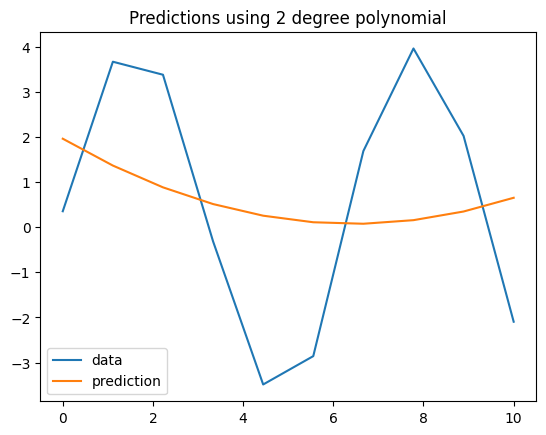

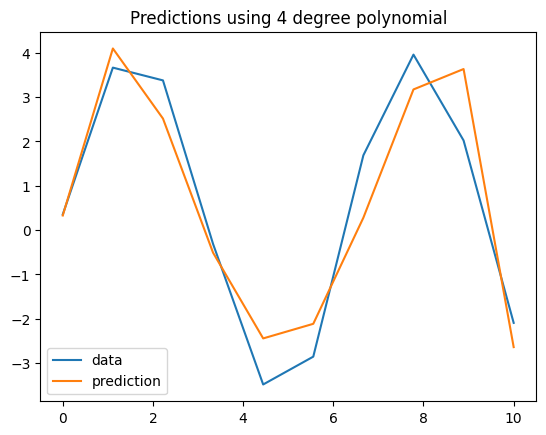

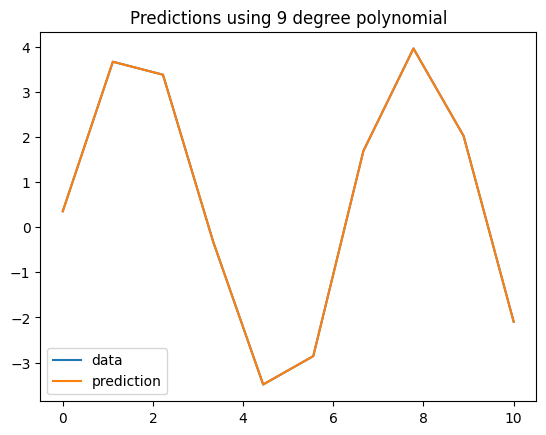

In [31]:
# your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)

X = np.linspace(0, 10, 10)

epsilon = np.random.normal(0, 0.2, 10)  
y = 4 * np.sin(X) + epsilon

#-------------------------------------- results ans plots

def sklearn_calls(X, y, degree):
    X = X.reshape(-1, 1) #column
    y = y.reshape(-1, 1) #column
    
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    predictions = model.predict(X_poly)
    
    return predictions
    
#-------------------------------------- results ans plots

pred_2_sk = sklearn_calls(X, y, 2)
plot_data_prediction(X, pred_2_sk, y, 2)

pred_4_sk = sklearn_calls(X, y, 4)
plot_data_prediction(X, pred_4_sk, y, 4)

pred_9_sk = sklearn_calls(X, y, 9)
plot_data_prediction(X, pred_9_sk, y, 9)


### Load the housing dataset

Using pandas, load the following dataset (available in eclass, taken from http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [33]:
housing_df = pd.read_csv('data/housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [34]:
X = housing_df.values[:,:-1]
y = housing_df['MEDV']

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.

In [38]:
# your code goes here:

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [ ]:
def ridge_regression():
    # your code goes here:
    
    

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

In [ ]:
# your code goes here:



Plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$

Your plot should like the one below.

In [ ]:
# your code goes here:



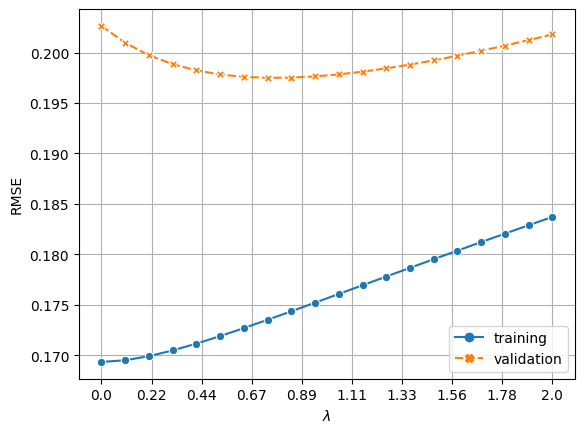

In [ ]:
## leave this cell untouched to see how the plot should look like

Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [ ]:
# your code goes here:



# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

In [ ]:
# The general way of using the Lasso implementation (or any other classifier/regressor) of scikit-learn is as follows:
# Make sure to replace X, y, and X_val with your training set variables!
alpha_value = 
lasso_regression = Lasso(alpha=alpha_value).fit(X, y)
y_predict_lasso_reg = lasso_regression.predict(X_val)

### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

In [ ]:
# your code goes here:



# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [ ]:
# your code goes here:



: 